In [ ]:
!pip install pystan==2.19.1.1 
!pip install fbprophet

In [4]:
import pandas as pd
from fbprophet import Prophet

# Loading the dataset

In [40]:
#load dataset Historical Product Demand.csv
df = pd.read_csv('Historical Product Demand.csv')

#show dataset
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [41]:
#show dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


# Data preprocessing

In [42]:
#preprocessing dataset

#drop null value
df = df.dropna()

#drop column 'Warehouse', 'Product_Code', 'Product_Category'
df = df.drop(['Warehouse', 'Product_Code', 'Product_Category'], axis=1)

#rename column 'Date' to 'ds' and 'Order_Demand' to 'y'
df = df.rename(columns={'Date':'ds', 'Order_Demand':'y'})

#show dataset
df.head()

,ds,y
0,2012/7/27,100
1,2012/1/19,500
2,2012/2/3,500
3,2012/2/9,500
4,2012/3/2,500


In [43]:
#convert column 'ds' to datetime   
df['ds'] = pd.to_datetime(df['ds'])

#convert values in column 'y' which is string to integer
df['y'] = df['y'].str.replace(r'\D', '').astype(int)

#show dataset
df.head()

/var/folders/rg/mwxswyvj085f5x_f4wqwmyx80000gn/T/ipykernel_79220/3015042646.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['y'] = df['y'].str.replace(r'\D', '').astype(int)


,ds,y
0,2012-07-27,100
1,2012-01-19,500
2,2012-02-03,500
3,2012-02-09,500
4,2012-03-02,500


In [44]:
#show dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037336 entries, 0 to 1048574
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   ds      1037336 non-null  datetime64[ns]
 1   y       1037336 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 23.7 MB


In [45]:
#put it in df_processed
df_processed = df

# Model fitting

In [17]:
#model fitting with suitable interval
model = Prophet(interval_width=0.95)

#fitting model
model.fit(df_processed)

#make future dataframe
future = model.make_future_dataframe(periods=365)

#show future dataframe
future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/shafkatrahman/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -30.1671
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

Error evaluating model log probability: Non-finite gradient.
Error evaluating model log probability: Non-finite gradient.

      38    4.5897e+06   2.23099e-06       14219.6      0.2841           1       66   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


,ds
2089,2018-01-05
2090,2018-01-06
2091,2018-01-07
2092,2018-01-08
2093,2018-01-09


In [18]:
#futre head
future.head()

,ds
0,2011-01-08
1,2011-05-31
2,2011-06-24
3,2011-09-02
4,2011-09-27


# Forecasting and Model Evaluation

In [19]:
#forecasting and evalutation

#forecasting
forecast = model.predict(future)

/Users/shafkatrahman/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/shafkatrahman/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [20]:
#show forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2089,2018-01-05,6261.074478,-52329.404236,61311.424446
2090,2018-01-06,4782.126332,-52099.338368,67723.241609
2091,2018-01-07,10943.035228,-42780.585439,67001.713831
2092,2018-01-08,6586.433602,-52534.732990,62374.559072
2093,2018-01-09,6300.779736,-52898.822882,61099.682241


In [21]:
#show forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2011-01-08,4029.449446,-52907.850030,61172.921434
1,2011-05-31,4747.447871,-52902.743751,66118.717443
2,2011-06-24,4692.822743,-54233.493467,59417.172380
3,2011-09-02,4556.758004,-52550.532421,65576.810601
4,2011-09-27,4461.838924,-51838.953495,62105.001051


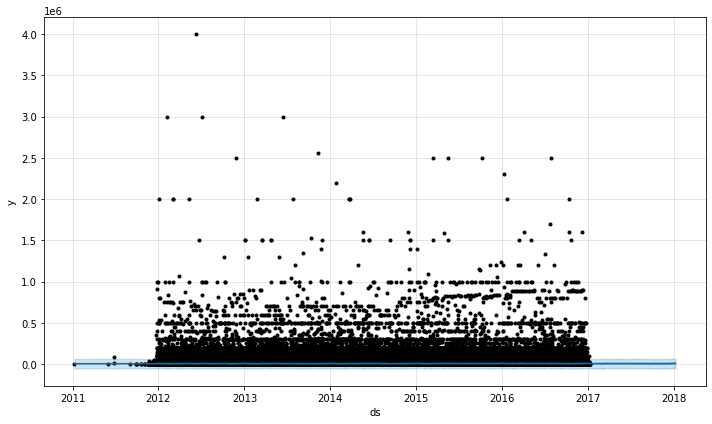

In [28]:
#plot forecast
model.plot(forecast);

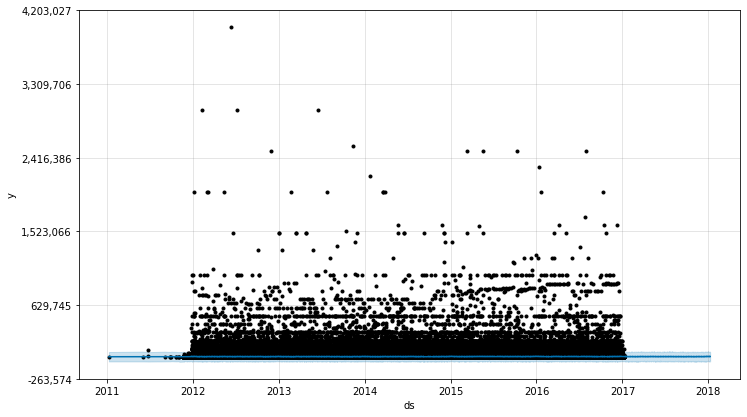

/Users/shafkatrahman/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/shafkatrahman/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


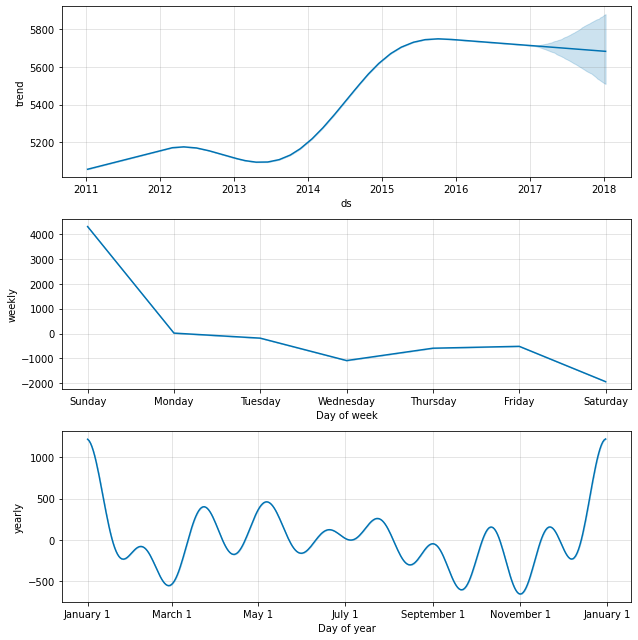

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the forecast
fig = model.plot(forecast)
ax = fig.gca()

# Set the minimum and maximum y values to 1000000 and 0
ax.set_ylim(ymin=0, ymax=1000000)


# Set a reasonable number of y-ticks (for example 6) and calculate the interval
num_ticks = 6
y_interval = (y_max - y_min) / (num_ticks - 1)

# Set the y-tick values
ax.set_yticks(np.arange(y_min, y_max + y_interval, y_interval))

# Format the y-tick labels with commas as thousand separators
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks()])

plt.show()

# Plot the forecast components
model.plot_components(forecast)
plt.show()